In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import tree
from sklearn.model_selection import train_test_split

from scipy import ndimage
from skimage.io import imread
from skimage import color
from skimage.transform import resize
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
import time
import cv2
from PIL import Image
%matplotlib inline
import scipy.misc
from sklearn.svm import SVC


from imblearn import under_sampling, over_sampling


from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn import preprocessing

In [24]:
df_features = pd.read_csv('data/features.csv')

# GET THE FEATURES / TRAINING AND TEST SET

In [27]:
# load the data bases
Train  = pd.read_csv('data/train.csv')
X_features =  df_features.loc[:,[xx for xx in df_features.columns if xx not in ['ImageSegId','Malignant','border1NEW','border2NEW','border3NEW']]]

Test = pd.read_csv('data/test.csv')
X_test_id = Test[['ImageId']]
X_test = pd.merge(X_test_id,X_features,on = 'ImageId' )
X_merged = pd.merge(Train,X_features,on = 'ImageId' )
X_merged.to_csv('data/training_features.csv', index=None, sep=',', mode='w')
X_train = X_merged.loc[:,[xx for xx in X_merged.columns if xx not in['ImageId','Malignant']]]
Y_train = X_merged[['ImageId','Malignant']]


X_train_val = X_train.values
Y_train_val = (Y_train[['Malignant']].values).reshape(1,599)
Y_train_val = Y_train_val[0]
X_test_val  = X_test.loc[:,X_test.columns !='ImageId'].values

In [28]:
X_features

,ImageId,Int/Out A,Int/Out B,Int/Out L,Mean Red,Mean Green,Mean Blue,Std Red,Std Green,Std Blue,f1,f2,color_Asm1,color_Asm2,border1,border2,border3
0,IM_000839,6.592233,-5.344395,-24.464932,141.403305,76.138858,59.356348,33.051904,35.996311,29.532735,15.431855,15.278272,6.623157,0.102065,0.568000,0.884615,1.545455
1,IM_000764,9.435975,11.052303,-17.513378,177.934414,140.767870,119.267686,21.566450,33.102061,37.248746,19.792004,18.343589,2.841392,0.067162,0.633333,0.940594,1.481013
2,IM_000847,12.067892,12.272357,-26.932157,191.121266,146.230489,126.174010,38.183883,51.732835,53.672145,34.858943,20.127427,9.573378,0.331451,0.619835,0.921569,1.450000
3,IM_000503,-2.991938,-3.219282,-47.724101,98.635038,86.355673,81.401641,69.890602,65.428576,64.014340,27.045493,23.562528,3.763290,0.032292,0.593496,0.875641,1.390244
4,IM_000169,-1.834943,-5.427625,-29.019240,132.197961,101.061412,107.357242,57.599711,52.337378,55.424546,30.616099,33.460547,30.767867,2.396294,0.580645,0.884615,1.481013
5,IM_000402,3.882130,8.448086,-5.264763,183.925657,145.846607,120.390153,4.923161,11.711033,18.582775,17.635936,16.516673,7.142128,0.997428,0.633333,1.000000,1.545455
6,IM_000234,-2.037647,-5.062983,-8.463933,143.491822,127.863590,122.154165,29.189866,34.684501,37.186587,21.825817,20.138314,7.627865,0.313743,0.258427,0.543307,0.979798
7,IM_000474,11.598973,-0.759587,-28.975201,182.277040,113.185881,83.681671,39.114360,47.640542,41.294563,29.550356,38.563957,5.615173,0.115184,0.568000,0.902913,1.450000
8,IM_000143,1.234025,-5.308873,-26.251819,163.460245,105.634082,85.365743,43.773489,39.777484,36.174028,18.803481,18.925384,7.403649,0.135362,0.555556,0.884615,1.481013
9,IM_000134,8.298158,4.062482,-27.984594,142.853286,112.818936,108.372382,45.039484,53.827806,53.204707,32.089934,22.228857,37.837421,4.153339,0.593496,0.866667,1.450000


# REPLACE THE NAN VALUES BY ZERO

In [29]:
X_train_val
i = 0
for x in X_train_val : 
    if(np.isnan(np.min(x))):
        print(i)
        X_train_val[i,0]=0
        X_train_val[i,1]=0
        X_train_val[i,2]=0
    i = i+1

i = 0
for x in X_test_val : 
    if(np.isnan(np.min(x))):
        print(i)
        X_test_val[i,0]=0
        X_test_val[i,1]=0
        X_test_val[i,2]=0
    i = i+1



108
294
301
345
374
480
272


## OVERSAMPLING THE DATA

In [30]:
Y_train.Malignant.value_counts()

0    484
1    115
Name: Malignant, dtype: int64

In [31]:
from imblearn.over_sampling import SMOTE
#x_train, x_val, y_train, y_val = train_test_split(training_features, training_target,
#                                                  test_size = .1,
#                                                  random_state=12)
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(X_train_val, Y_train_val)
x_pd = pd.DataFrame(x_train_res)

/Users/raphael/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


## OBSERVING

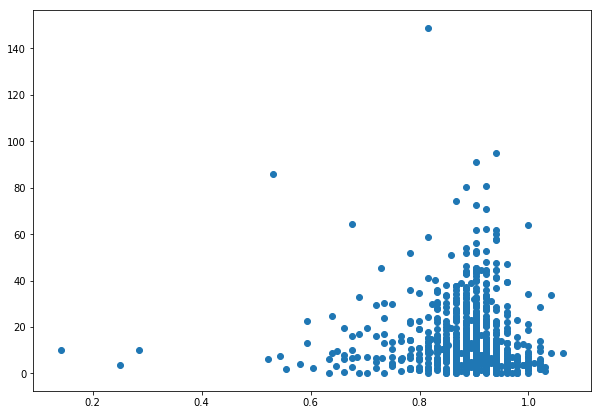

In [32]:
f1 = X_features['border2'].values
f2 = X_features['color_Asm1'].values

plt.figure(figsize=(10,7))
plt.scatter(f1,f2)
plt.show()

## RESCALING
Il s'avère que cette partie n'a pas du tout été concluante, c'est pourquoi elle est commentée

In [47]:
#from sklearn.preprocessing import StandardScaler


In [48]:
#scaler = StandardScaler()
#x_train_res = (scaler.fit_transform(x_train_res))


## Decision trees

In [68]:
clf=sklearn.tree.DecisionTreeClassifier(criterion='gini',max_depth=50)
clf=clf.fit(x_train_res,y_train_res)
y_test = clf.predict(X_test_val)
Test['Malignant'] = y_test

In [69]:
Test['Malignant'] = Test['Malignant'].astype(int)
Test.to_csv('data/submission_trees_oversampling.csv', index=None, sep=',', mode='w')

In [70]:
y_test

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0])

## SVM

In [12]:
t0 = time.time()
clf = SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
clf.fit(x_train_res, y_train_res)
y_test = clf.predict(X_test_val)
print(y_test)
Test['Malignant'] = y_test
Test['Malignant'] = Test['Malignant'].astype(int)

print(time.time()-t0)
#Test.to_csv('data/submission_oversampling_SVM.csv', index=None, sep=',', mode='w')

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
0.09355711936950684


In [11]:
print(np.sum(y_test))
Test.to_csv('data/submission_oversampling_SVM_poly.csv', index=None, sep=',', mode='w')

77


## ADABOOST

In [32]:
clf = AdaBoostClassifier(n_estimators=100)
clf.fit(x_train_res, y_train_res)
y_test = clf.predict(X_test_val)
Test['Malignant'] = y_test
Test['Malignant'] = Test['Malignant'].astype(int)
Test.to_csv('data/submission_oversampling_ADABOOST.csv', index=None, sep=',', mode='w')

## RANDOM FOREST

In [15]:
clf = RandomForestClassifier(n_estimators=10000, criterion='entropy', max_depth=50, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=0.5, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, class_weight=None)
clf.fit(x_train_res, y_train_res)
y_test = clf.predict(X_test_val)

Test['Malignant'] = y_test
Test['Malignant'] = Test['Malignant'].astype(int)
#Test.to_csv('data/submission_oversampling_Random_Forest.csv', index=None, sep=',', mode='w')


In [16]:
np.sum(y_test)

40

## Bagging

In [36]:
clf = BaggingClassifier(n_estimators=10000, max_samples=0.6, max_features=1.0)
clf.fit(x_train_res, y_train_res)
y_test = clf.predict(X_test_val)
print(y_test)
Test['Malignant'] = y_test
Test['Malignant'] = Test['Malignant'].astype(int)
#Test.to_csv('data/submission_oversampling_bagging.csv', index=None, sep=',', mode='w')

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0
 0 0 1 1]


In [37]:
np.sum(y_test)

51

In [38]:
Test.to_csv('data/submission_oversampling_bagging.csv', index=None, sep=',', mode='w')

In [28]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x_train_res, y_train_res, test_size=0.2, random_state=0)
scores = []
for i in range(1,50):
    clf = BaggingClassifier(n_estimators=10000, max_samples=0.02*i, max_features=1.0)
    clf.fit(X_train1, y_train1)
    score = clf.score(X_test1,y_test1)
    scores.append(score)
    print(score)
    

0.721649484536
0.752577319588
0.773195876289
0.79381443299
0.80412371134
0.809278350515
0.814432989691
0.814432989691
0.814432989691
0.819587628866
0.824742268041
0.824742268041
0.824742268041
0.829896907216
0.829896907216
0.840206185567
0.845360824742
0.845360824742
0.845360824742
0.850515463918
0.850515463918
0.850515463918
0.850515463918
0.850515463918
0.850515463918
0.865979381443
0.865979381443
0.876288659794
0.871134020619
0.876288659794
0.876288659794
0.871134020619
0.871134020619
0.871134020619
0.871134020619
0.876288659794
0.881443298969
0.871134020619
0.871134020619
0.881443298969
0.881443298969
0.876288659794
0.881443298969
0.881443298969
0.886597938144
0.881443298969
0.881443298969
0.881443298969
0.876288659794


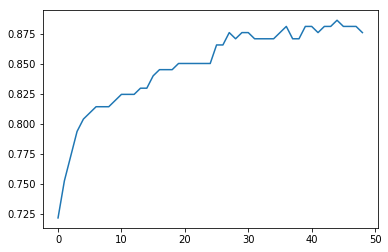

In [29]:
plt.plot(scores)
plt.show()

In [73]:
clf = BaggingClassifier(n_estimators=10000, max_samples=0.7, max_features=1.0)
clf.fit(x_train_res, y_train_res)
y_test1 = clf.predict(X_test_val)
print(y_test1)
#Test['Malignant'] = y_test
#Test['Malignant'] = Test['Malignant'].astype(int)
#Test.to_csv('data/submission_oversampling_bagging.csv', index=None, sep=',', mode='w')

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0
 0 0 1 1]


In [8]:
from sklearn.model_selection import cross_val_score
A=[]
B=[]
X_train1, X_test1, y_train1, y_test1 = train_test_split(x_train_res, y_train_res, test_size=0.2, random_state=0)
for i in range(1,20):
    clf = SVC(C=20*i, cache_size=200, class_weight=None, coef0=1.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.02, verbose=False)
    scores = cross_val_score(clf, x_train_res, y_train_res, cv=5)
    A.append(scores)
    print(i)

#plt.figure(figsize=(15, 15))
#plt.plot(A,label='SVM')

#plt.legend()
#plt.show()
#clf = SVC(C=10, kernel='linear')
#clf.fit(X_train1, y_train1)
#clf.score(X_test1,y_test1)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [19]:
from  sklearn.feature_selection import GenericUnivariateSelect
importance = GenericUnivariateSelect(score_func=sklearn.feature_selection.f_classif,
                                     mode='fpr', #percentile, k_best, fpr, fdr, fwe
                                     param=10**(-3) )
importance.fit(X=x_train_res, y = y_train_res)
fscores, fpvalues = importance.scores_, importance.pvalues_

In [22]:
fscores

array([ 26.36852525,  39.31562106,  10.02217292,   8.43778543,
         2.00135403,   2.70882205,  14.00610371,   9.39782759,
         6.94159622,  34.82752088,  42.17397848,  20.31423171,
         0.80436331,  75.33356445,  90.65597416,  92.06526274,
        64.0714714 ,  76.39332427,  79.65300845])

In [23]:
feat_df

NameError: name 'feat_df' is not defined